In [22]:
import os
import pandas as pd
import numpy as np
from matplotlib.pylab import plt

### Getting Data

In [36]:
sp_data = pd.read_csv('sp500df.csv')
sp_data = sp_data.set_index('Date')

sp_sector_mapping = pd.read_csv('SP500_Sectors.csv')

sp_sectors_data = pd.read_csv('SP500_Sector_Data.csv')
sp_sectors_data = sp_sectors_data.set_index('Effective date ')

In [39]:
sp_sectors_data.head()

,S&P 500 Communication Services (Sector),S&P 500 Consumer Discretionary (Sector),S&P 500 Consumer Staples (Sector),S&P 500 Energy (Sector),S&P 500 Financials (Sector),S&P 500 Health Care (Sector),S&P 500 Industrials (Sector),S&P 500 Information Technology (Sector),S&P 500 Materials (Sector),S&P 500 Real Estate (Sector),S&P 500 Utilities (Sector)
Effective date,,,,,,,,,,,
2010-10-29,121.40,277.50,296.38,442.59,195.83,361.00,277.81,391.58,215.50,116.15,160.85
2010-11-01,121.82,277.43,296.14,443.87,195.80,361.63,278.06,392.93,215.50,117.56,159.48
2010-11-02,122.86,280.35,297.43,448.80,196.31,364.43,280.24,396.54,217.46,118.39,161.37
2010-11-03,123.50,281.66,298.25,449.68,198.28,364.82,280.63,398.35,216.88,118.13,160.91
2010-11-04,125.24,286.03,301.71,462.95,205.06,366.26,286.67,404.61,224.07,121.42,162.55


In [3]:
sp_sectors_data.columns

Index(['Effective date ', 'S&P 500 Communication Services (Sector)',
       'S&P 500 Consumer Discretionary (Sector)',
       'S&P 500 Consumer Staples (Sector)', 'S&P 500 Energy (Sector)',
       'S&P 500 Financials (Sector)', 'S&P 500 Health Care (Sector)',
       'S&P 500 Industrials (Sector)',
       'S&P 500 Information Technology (Sector)', 'S&P 500 Materials (Sector)',
       'S&P 500 Real Estate (Sector)', 'S&P 500 Utilities (Sector)'],
      dtype='object')

In [40]:
sp_data.head()

,AAL,AAPL,AAP,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,...,MO,PRU,RE,SCHW,STZ,T,VRTX,XEC,XOM,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2010-11-04,11.56,11.366786,65.809998,31.959999,24.412224,45.669998,29.459999,35.630001,31.559999,40.175594,...,26.150000,55.590000,88.330002,15.84,19.950001,29.440001,34.770000,80.480003,69.379997,31.719999
2010-11-05,11.57,11.326072,65.629997,31.680000,24.431416,45.669998,29.139999,35.529999,31.350000,40.245831,...,26.110001,55.639999,88.820000,16.10,20.070000,29.270000,35.060001,79.879997,70.000000,31.719999
2010-11-08,11.23,11.379286,65.970001,31.450001,24.205910,44.980000,29.290001,35.419998,31.190001,39.920982,...,25.870001,54.990002,87.980003,15.79,20.040001,29.180000,34.509998,80.959999,70.320000,31.270000
2010-11-09,10.99,11.288571,66.010002,30.830000,24.013990,45.299999,29.490000,35.070000,30.850000,39.780510,...,25.580000,54.889999,87.690002,15.53,19.900000,29.180000,34.270000,81.790001,70.629997,31.639999
2010-11-10,10.78,11.358214,66.720001,31.469999,24.071566,45.500000,29.790001,34.709999,30.780001,40.131695,...,25.209999,55.779999,88.379997,15.38,19.889999,29.049999,34.439999,81.889999,71.129997,31.690001


In [47]:
# Get return data
sp_returns = sp_data.pct_change(axis='rows')
sp_returns = sp_returns.drop(sp_returns.index[0])

sector_returns = sp_sectors_data.pct_change(axis='rows')
sector_returns = sector_returns.drop(sector_returns.index[0])

In [48]:
sector_returns.head()

,S&P 500 Communication Services (Sector),S&P 500 Consumer Discretionary (Sector),S&P 500 Consumer Staples (Sector),S&P 500 Energy (Sector),S&P 500 Financials (Sector),S&P 500 Health Care (Sector),S&P 500 Industrials (Sector),S&P 500 Information Technology (Sector),S&P 500 Materials (Sector),S&P 500 Real Estate (Sector),S&P 500 Utilities (Sector)
Effective date,,,,,,,,,,,
2010-11-01,0.003460,-0.000252,-0.000810,0.002892,-0.000153,0.001745,0.000900,0.003448,0.000000,0.012139,-0.008517
2010-11-02,0.008537,0.010525,0.004356,0.011107,0.002605,0.007743,0.007840,0.009187,0.009095,0.007060,0.011851
2010-11-03,0.005209,0.004673,0.002757,0.001961,0.010035,0.001070,0.001392,0.004564,-0.002667,-0.002196,-0.002851
2010-11-04,0.014089,0.015515,0.011601,0.029510,0.034194,0.003947,0.021523,0.015715,0.033152,0.027851,0.010192
2010-11-05,-0.005989,0.005244,-0.004010,0.004687,0.021213,-0.005324,0.005372,0.000297,0.003303,0.011201,-0.000062


In [68]:
all_sp = sp_data.columns.values
best_stocks = {}

for sector in sp_sector_mapping.Sector.unique():
    
    # Get the tickers for that sector only, and select the values that are available in our dataframe
    sector_tickers = sp_sector_mapping.Ticker.loc[sp_sector_mapping.Sector == sector]
    sector_tickers = list(set(all_sp) & set(list(sector_tickers.values)))
    
    # Get the sector data, including for individual stocks
    sector_data = sp_returns[sector_tickers]
    sector_data = pd.merge(sector_data, sector_returns['S&P 500 '+ sector +' (Sector)'],\
                                                    left_index=True, right_index=True,\
                                                    how = 'left')
    
    # Get the correlation
    corrs = sector_data[sector_data.columns[1:]].corr()['S&P 500 '+ sector +' (Sector)'][:-1]
    
    if 'GOOG' in sector_data.columns[1:]:
        top_best = list(corrs.nlargest(3).index.values)
        bottom_best = list(corrs.nsmallest(2).index.values)
        
        if 'GOOG' in top_best:
            all_best = list(set(all_best).difference({'GOOG'})) + bottom_best
            best_stocks[sector] = all_best
        
        else:
            best_stocks[sector] = list(corrs.nlargest(2).index.values) + list(corrs.nsmallest(2).index.values)
            
    else:
        best_stocks[sector] = list(corrs.nlargest(2).index.values) + list(corrs.nsmallest(2).index.values)

In [69]:
best_stocks

{'Industrials': ['ETN', 'AME', 'AAL', 'CHRW'],
 'Health Care': ['ABT', 'AMGN', 'VRTX', 'ALGN'],
 'Information Technology': ['AAPL', 'ADBE', 'AMD', 'ADS'],
 'Communication Services': ['T', 'CMCSA', 'ATVI', 'CHTR'],
 'Consumer Discretionary': ['AMZN', 'F', 'DG', 'CMG'],
 'Utilities': ['DUK', 'LNT', 'AES', 'FE'],
 'Financials': ['C', 'BAC', 'CBOE', 'RE'],
 'Materials': ['APD', 'FMC', 'BLL', 'CF'],
 'Real Estate': ['DRE', 'BXP', 'EQIX', 'CCI'],
 'Consumer Staples': ['CL', 'KMB', 'KR', 'STZ'],
 'Energy': ['CVX', 'XOM', 'COG', 'APA']}

In [90]:
final_stocks = []
for stock in best_stocks.keys():
    final_stocks += best_stocks[stock]
    
final_stocks

['ETN',
 'AME',
 'AAL',
 'CHRW',
 'ABT',
 'AMGN',
 'VRTX',
 'ALGN',
 'AAPL',
 'ADBE',
 'AMD',
 'ADS',
 'T',
 'CMCSA',
 'ATVI',
 'CHTR',
 'AMZN',
 'F',
 'DG',
 'CMG',
 'DUK',
 'LNT',
 'AES',
 'FE',
 'C',
 'BAC',
 'CBOE',
 'RE',
 'APD',
 'FMC',
 'BLL',
 'CF',
 'DRE',
 'BXP',
 'EQIX',
 'CCI',
 'CL',
 'KMB',
 'KR',
 'STZ',
 'CVX',
 'XOM',
 'COG',
 'APA']

### Plotting

In [79]:
def plot_prices(data, stocks, sector):
    df_plot = data[stocks]
    
    
    plt.figure();
    df_plot.plot()
    plt.legend(loc="best")

    plt.title(sector, fontsize=16, fontweight='bold')
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.show()

In [80]:
# Get cumulataive return data
all_data = pd.merge(sp_returns, sector_returns, left_index=True, right_index=True, how = 'left')
cumulative_returns_data = all_data.cumsum()

<Figure size 432x288 with 0 Axes>

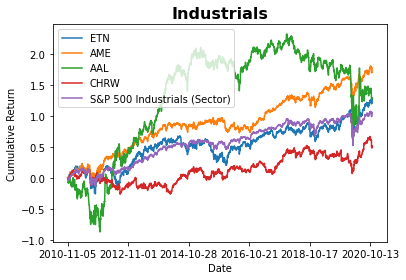

<Figure size 432x288 with 0 Axes>

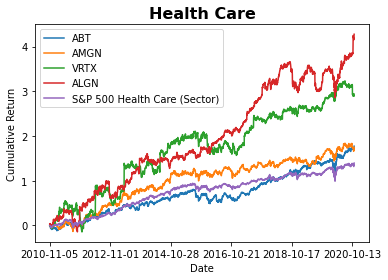

<Figure size 432x288 with 0 Axes>

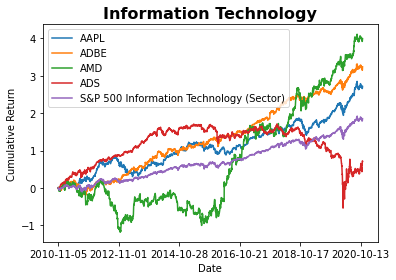

<Figure size 432x288 with 0 Axes>

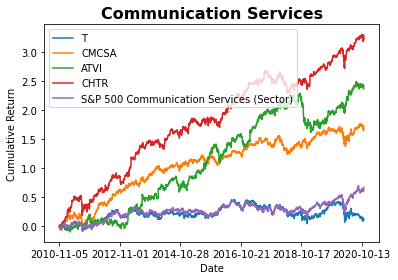

<Figure size 432x288 with 0 Axes>

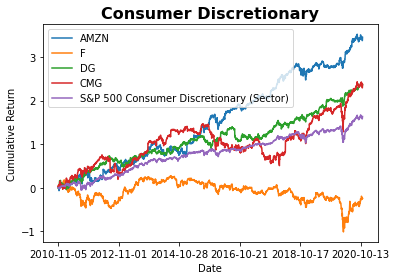

<Figure size 432x288 with 0 Axes>

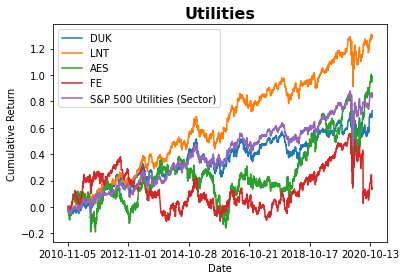

<Figure size 432x288 with 0 Axes>

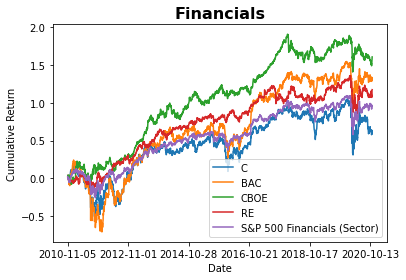

<Figure size 432x288 with 0 Axes>

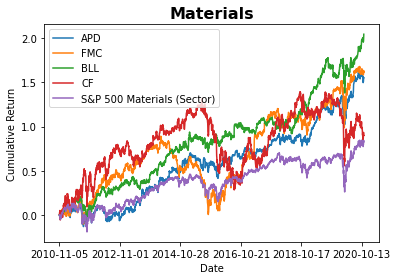

<Figure size 432x288 with 0 Axes>

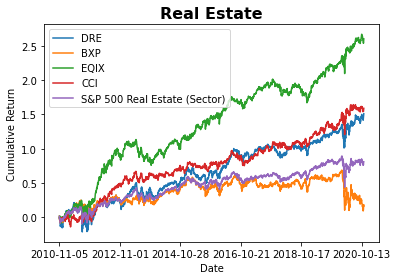

<Figure size 432x288 with 0 Axes>

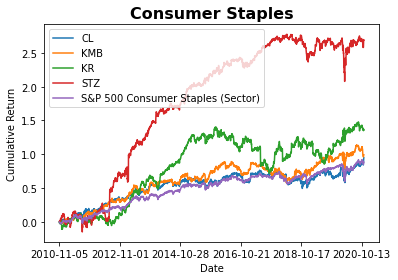

<Figure size 432x288 with 0 Axes>

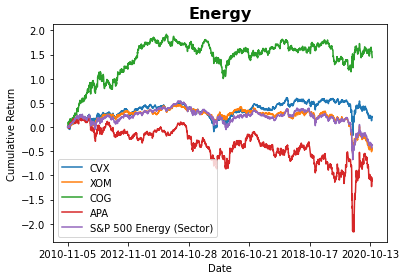

In [81]:
# Plot
for sector in best_stocks.keys():
    plot_prices(cumulative_returns_data, best_stocks[sector] + ['S&P 500 '+ sector +' (Sector)'], sector)